
Size of Original Dataset
------------------------
Observations: 1946
Features:     28

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   i

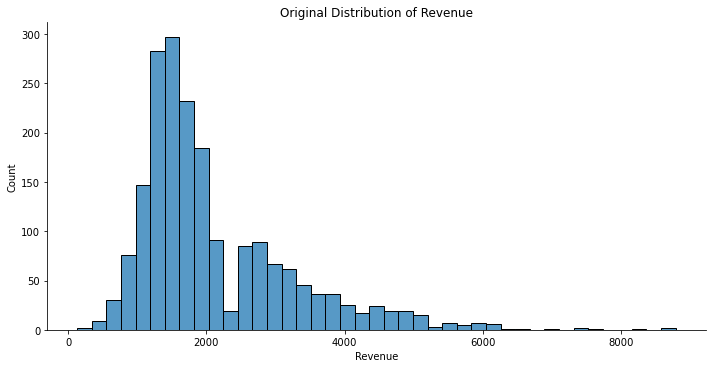

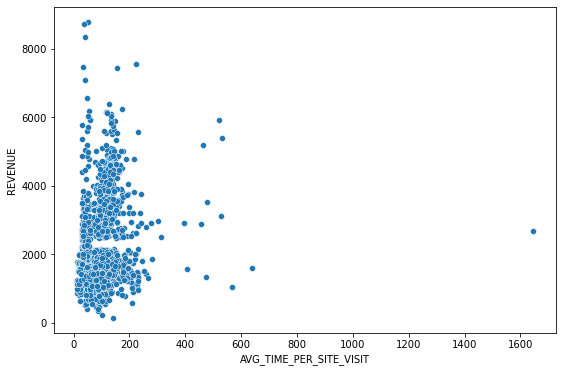

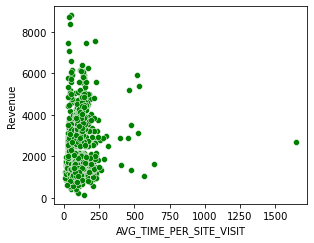

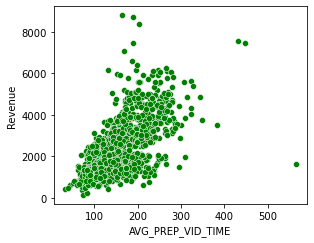

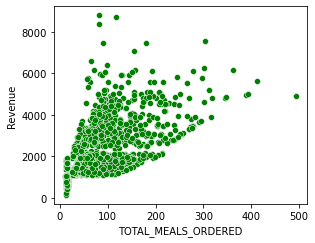

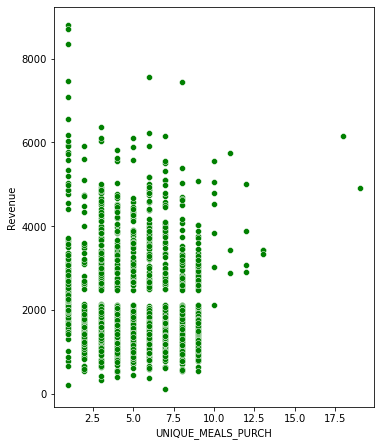

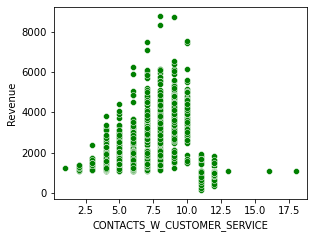

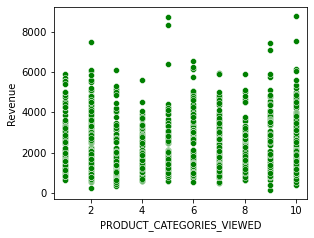

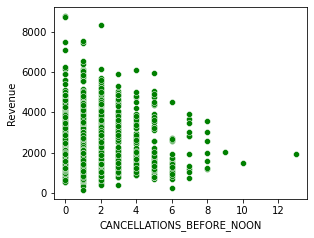

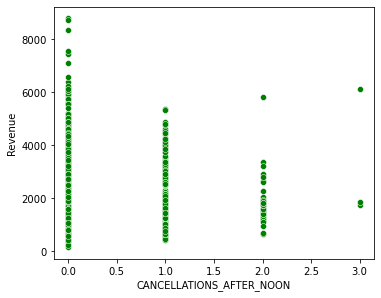

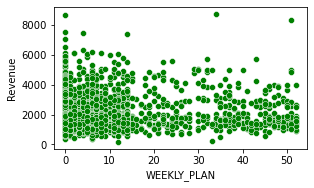

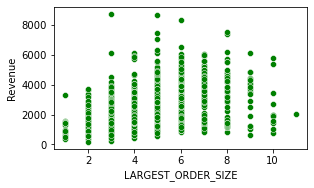

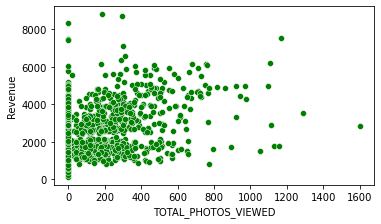

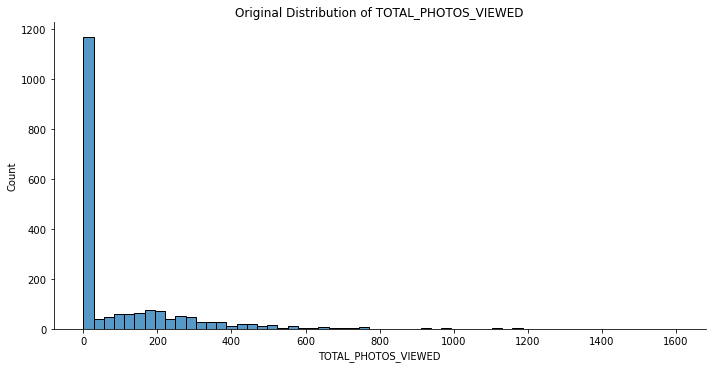

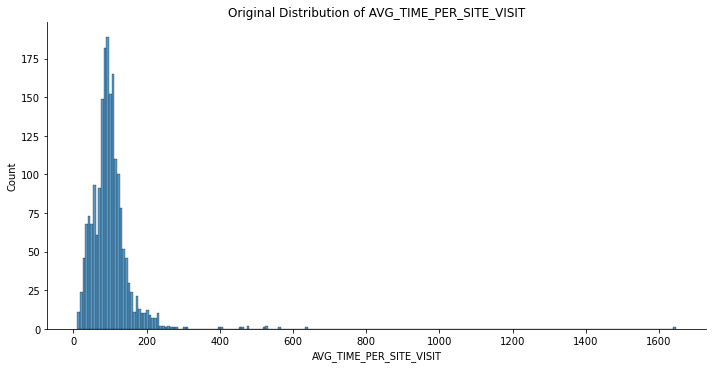

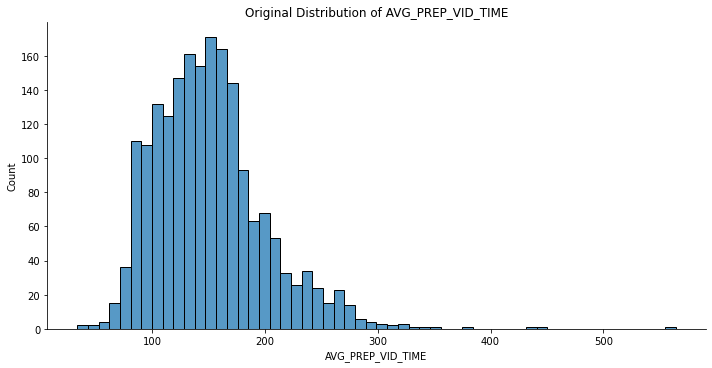

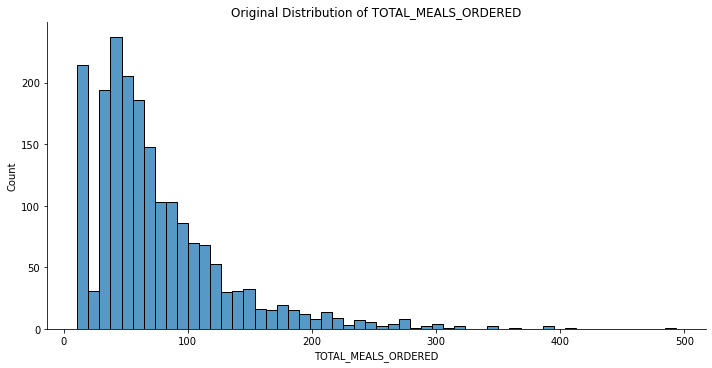

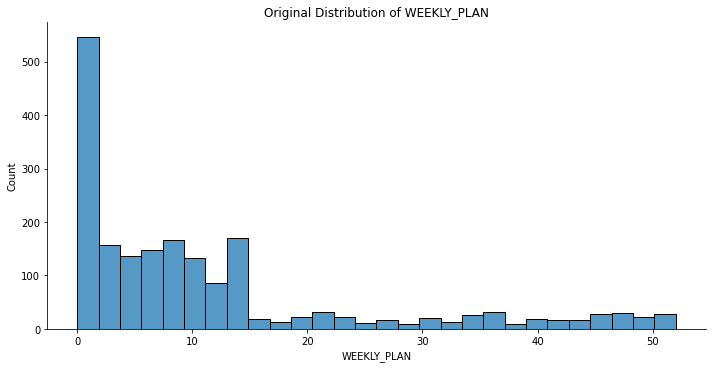

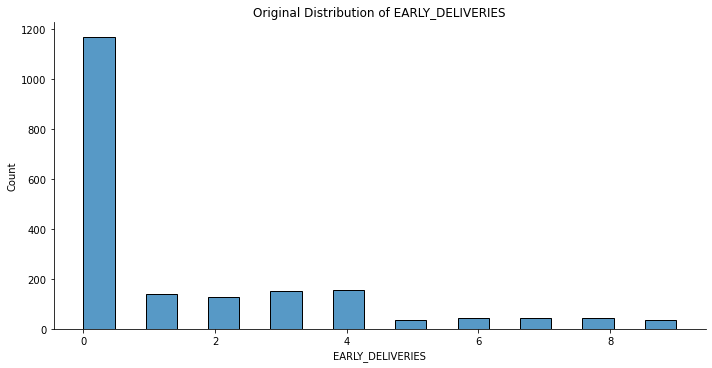

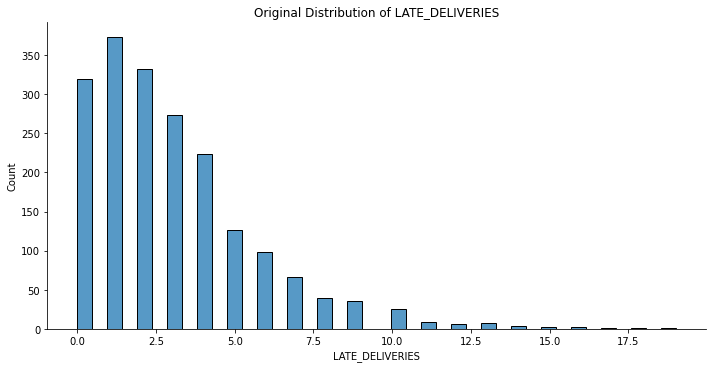

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     191.8
Date:                Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:43:26   Log-Likelihood:                 1449.3
No. Observations:                1946   AIC:                            -2849.
Df Residuals:                    1921   BIC:                            -2709.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

,Model Type,Training Score,Testing score,Train-Test Gap,Model Size,Model
0,OLS,0.7047,0.7038,0.0009,25,"[(intercept, 1.77), (log_AVG_TIME_PER_SITE_VIS..."


In [1]:
# Importing Libraries
import pandas as pd                                  #Data science essentials
import matplotlib.pyplot as plt                      # Graphical output
import seaborn as sns                                # Graphical output
import statsmodels.formula.api as smf                # Regression Modeling
from sklearn.model_selection import train_test_split # Train/Test Split
from sklearn.linear_model import LinearRegression    # Linear Regression
from sklearn.neighbors import KNeighborsRegressor    # KNN Model
from sklearn.preprocessing import StandardScaler     # Standard Scalar
import random as rand                                # Random selection
import numpy as np                                   # Basic Mathematics Essentials
import gender_guesser.detector as gender             # Gender guesser
import sklearn.linear_model

# Setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Specifying the file names
apperentice_data       = './Apprentice_Chef_Dataset.xlsx'
apperentice_dictionary = './Apprentice_Chef_Data_Dictionary.xlsx'

# Reading the files into Python
apparentice = pd.read_excel(apperentice_data)
dictionary  = pd.read_excel (apperentice_dictionary)

# Checking dataset
apparentice.head(n = 5)

# Viewing total number of rows and columns
apparentice.shape   # output (1946 rows, 28 columns)
print(f"""
Size of Original Dataset
------------------------
Observations: {apparentice.shape[0]}
Features:     {apparentice.shape[1]}
""")


# Looking at variable info
apparentice.info()


           ###### ANALYZING THE DISTRIBUTION OF REVENUE #######
# Histogram for seeing the skewness of revenue
sns.displot(data   = apparentice,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)

plt.title(label   = "Original Distribution of Revenue")
plt.xlabel(xlabel = "Revenue")
plt.ylabel(ylabel = "Count")
plt.show()
# per the graph, we can see that the revenue is skewed positive. Need to transform later


# Using descriptive stats to view the numerical data
apparentice.describe(include = [int, float]).round(2)


              ########## Categorizing data into groups ##############
# CONTINUOUS: REVENUE, AVG_TIME_PER_SITE_VISIT, AVG_PREP_VID_TIME

# INTERVAL : CROSS_SELL_SUCCESS, TOTAL_MEALS_ORDERED, UNIQUE_MEALS_PURCH,
# CONTACTS_W_CUSTOMER_SERVICE, PRODUCT_CATEGORIES_VIEWED, CANCELLATIONS_BEFORE_NOON,
# CANCELLATIONS_AFTER_NOON, PC_LOGINS, MOBILE_LOGINS, WEEKLY_PLAN,
# EARLY_DELIVERIES, LATE_DELIVERIES, LARGEST_ORDER_SIZE, MASTER_CLASSES_ATTENDED,
# MEDIAN_MEAL_RATING, AVG_CLICKS_PER_VISIT, TOTAL_PHOTOS_VIEWED

# CATEGORICAL: MOBILE_NUMBER, TASTES_AND_PREFERENCES, , PACKAGE_LOCKER, REFRIGERATED_LOCKER



# Looking at how the continuous variables affect the revenue.
apparantice_data = ['REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME']

# Correlation matrix based on continuous features
apparentice_corr = apparentice[apparantice_data].corr(method = 'pearson')

# Filtering the results to show correlations with REVENUE
apparentice_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)
# Strongest correlation with revenue is AVG_PREP_VID_TIME.


# Scatterplot for revenue and the streongest variable.
fig, ax = plt.subplots(figsize = (9, 6))

# developing a scatterplot
sns.scatterplot(x    = 'AVG_TIME_PER_SITE_VISIT',
                y    = 'REVENUE',
                data = apparentice)

# SHOWing the results
plt.show()
# We can see a lot of outliers in the scatterplot.
 

         ############# DEALING WITH MISSING VALUES #############
# Turning missing values into boolean to sum up per column
apparentice.isnull().sum(axis = 0)
# We can see 47 missing values for family name.


             ########### LOOKING AT OUTLIERS #############
# Looking at x-variables versus Revenue
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = apparentice['AVG_TIME_PER_SITE_VISIT'],
                y = apparentice['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = apparentice['AVG_PREP_VID_TIME'],
                y = apparentice['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'Revenue')


########################  
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = apparentice['TOTAL_MEALS_ORDERED'],
                y = apparentice['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = apparentice['UNIQUE_MEALS_PURCH'],
                y = apparentice['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'Revenue')

########################    
# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./Apparentice Scatterplots 1 of 3.png')
plt.show()



########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = apparentice['CONTACTS_W_CUSTOMER_SERVICE'],
                y = apparentice['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = apparentice['PRODUCT_CATEGORIES_VIEWED'],
                y = apparentice['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = apparentice['CANCELLATIONS_BEFORE_NOON'],
                y = apparentice['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'CANCELLATIONS_BEFORE_NOON')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = apparentice['CANCELLATIONS_AFTER_NOON'],
                y = apparentice['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'Revenue')

########################    
# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./Apparentice Scatterplots 2 of 3.png')
plt.show()

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(4, 2, 1)
sns.scatterplot(x = apparentice['WEEKLY_PLAN'],
                y = apparentice['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(4, 2, 2)
sns.scatterplot(x = apparentice['LARGEST_ORDER_SIZE'],
                y = apparentice['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'Revenue')

########################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

# developing a scatterplot
plt.subplot(4, 2, 3)
sns.scatterplot(x = apparentice['TOTAL_PHOTOS_VIEWED'],
                y = apparentice['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'Revenue')

########################    
# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./Apparentice Scatterplots 3 of 3.png')
plt.show()



        #######################################################
    
    ###### ANALYZING THE DISTRIBUTION OF VARIABLES #######
# Histogram for seeing the skewness of TOTAL_PHOTOS_VIEWED
sns.displot(data   = apparentice,
            x      = 'TOTAL_PHOTOS_VIEWED',
            height = 5,
            aspect = 2)

plt.title(label   = "Original Distribution of TOTAL_PHOTOS_VIEWED")
plt.xlabel(xlabel = "TOTAL_PHOTOS_VIEWED")
plt.ylabel(ylabel = "Count")
plt.show()
# per the graph, we can see that the revenue is skewed positive.
# Might need to be transformed.


# Histogram for seeing the skewness of AVG_TIME_PER_SITE_VISIT
sns.displot(data   = apparentice,
            x      = 'AVG_TIME_PER_SITE_VISIT',
            height = 5,
            aspect = 2)

plt.title(label   = "Original Distribution of AVG_TIME_PER_SITE_VISIT")
plt.xlabel(xlabel = "AVG_TIME_PER_SITE_VISIT")
plt.ylabel(ylabel = "Count")
plt.show()
# Positively skewed. Might need to transform.


# Histogram for seeing the skewness of AVG_PREP_VID_TIME
sns.displot(data   = apparentice,
            x      = 'AVG_PREP_VID_TIME',
            height = 5,
            aspect = 2)

plt.title(label   = "Original Distribution of AVG_PREP_VID_TIME")
plt.xlabel(xlabel = "AVG_PREP_VID_TIME")
plt.ylabel(ylabel = "Count")
plt.show()
# A little bit skewed to the right. Might need to be transformed.


# Histogram for seeing the skewness of TOTAL_MEALS_ORDERED
sns.displot(data   = apparentice,
            x      = 'TOTAL_MEALS_ORDERED',
            height = 5,
            aspect = 2)

plt.title(label   = "Original Distribution of TOTAL_MEALS_ORDERED")
plt.xlabel(xlabel = "TOTAL_MEALS_ORDERED")
plt.ylabel(ylabel = "Count")
plt.show()
# positively skewed, might need to be transformed


# Histogram for seeing the skewness of WEEKLY_PLAN
sns.displot(data   = apparentice,
            x      = 'WEEKLY_PLAN',
            height = 5,
            aspect = 2)

plt.title(label   = "Original Distribution of WEEKLY_PLAN")
plt.xlabel(xlabel = "WEEKLY_PLAN")
plt.ylabel(ylabel = "Count")
plt.show()
# no normal distribution, more data towards the left.


# Histogram for seeing the skewness of EARLY_DELIVERIES
sns.displot(data   = apparentice,
            x      = 'EARLY_DELIVERIES',
            height = 5,
            aspect = 2)

plt.title(label   = "Original Distribution of EARLY_DELIVERIES")
plt.xlabel(xlabel = "EARLY_DELIVERIES")
plt.ylabel(ylabel = "Count")
plt.show()
# no normal distribution, more data towards the left.


# Histogram for seeing the skewness of LATE_DELIVERIES
sns.displot(data   = apparentice,
            x      = 'LATE_DELIVERIES',
            height = 5,
            aspect = 2)

plt.title(label   = "Original Distribution of LATE_DELIVERIES")
plt.xlabel(xlabel = "LATE_DELIVERIES")
plt.ylabel(ylabel = "Count")
plt.show()
# Rightly skewed, need to be transformed.




     ############ Splitting personal emails ################
# placeholder list
placeholder_lst = []

# looping over each email address to separate email domains
for index, col in apparentice.iterrows():
    
    # splitting email domain at '@'
    split_email = apparentice.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# Checking the results
email_df

# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_domain']


# concatenating personal_email_domain with friends DataFrame
apparentice = pd.concat([apparentice, email_df['EMAIL_domain']],
                     axis = 1)


# printing value counts of personal_email_domain
apparentice.loc[: ,'EMAIL_domain'].value_counts()

# SEPARATING WORK EMAIL FROM PERSONAL EMAIL
# defining email domain types
personal_email_domains = ['@gmail.com', '@protonmail.com', '@yahoo.com',
                          '@msn.com', '@aol.com', '@passport.com', '@hotmail.com', 
                          '@live.com', '@me.com']
work_email_domains  = ['@amex.com', '@mcdonalds.com', '@jnj.com', '@merck.com',
                         '@cocacola.com', '@nike.com', '@apple.com', '@ibm.com',
                         '@ge.org', '@dupont.com', '@chevron.com', '@microsoft.com',
                         '@exxon.com', '@unitedhealth.com', '@travelers.com',
                         '@boeing.com', '@mmm.com', '@caterpillar.com', '@pg.com',
                         '@verizon.com', '@walmart.com', '@disney.com', '@pfizer.com',
                         '@visa.com', '@jpmorgan.com', '@cisco.com', '@goldmansacs.com',
                         '@unitedtech.com', '@intel.com', '@homedepot.com']
placeholder_lst = []

# looping to group observations by domain types defined above
for domain in apparentice['EMAIL_domain']:
    
    if '@' + domain in personal_email_domains:
        placeholder_lst.append('personal')
        

    elif '@' + domain in work_email_domains:
        placeholder_lst.append('work')


    else:
            print('Unknown')


# concatenating with original DataFrame
apparentice['domain_group'] = pd.Series(placeholder_lst)


# checking results
apparentice['domain_group'].value_counts()

apparentice['work_email']   = 'work'
for index, value in apparentice.iterrows():
    
    # Total_Bsmt_SF
    if apparentice.loc[index, 'domain_group'] == 'work':
        apparentice.loc[index, 'work_email'] = 0
    else:
        apparentice.loc[index, 'work_email'] = 1
        

        

        ######### DOING A LOG TRANSOFRMATION TO REVENUE ##########
# log transforming REVENUE and saving it to the dataset
apparentice['log_REVENUE'] = np.log10(apparentice['REVENUE'])



    ######### TRANSFORMING DATA THAT IS SKEWED TO LOGRITHMIC ##########
# Transforming TOTAL_PHOTOS_VIEWED
apparentice['log_TOTAL_PHOTOS_VIEWED'] = np.log10(apparentice['TOTAL_PHOTOS_VIEWED'])

log_corr_photosviewed = apparentice.loc[ : , ['TOTAL_PHOTOS_VIEWED',
                             'log_TOTAL_PHOTOS_VIEWED',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

log_corr_photosviewed.loc[ ['TOTAL_PHOTOS_VIEWED', 'log_TOTAL_PHOTOS_VIEWED'],
              ['REVENUE', 'log_REVENUE']   ]
# We will not be transforming this since log revenue works better with total
# photos viewed.


# Transforming AVG_TIME_PER_SITE_VISIT
apparentice['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(apparentice['AVG_TIME_PER_SITE_VISIT'])

log_corr_timepersite = apparentice.loc[ : , ['AVG_TIME_PER_SITE_VISIT',
                             'log_AVG_TIME_PER_SITE_VISIT',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

log_corr_timepersite.loc[ ['AVG_TIME_PER_SITE_VISIT', 'log_AVG_TIME_PER_SITE_VISIT'],
              ['REVENUE', 'log_REVENUE']   ]
# stronger with logrithmic. We will be using the logrithmic for this.


# Transforming AVG_PREP_VID_TIME
apparentice['log_AVG_PREP_VID_TIME'] = np.log10(apparentice['AVG_PREP_VID_TIME'])

log_corr_vidtime = apparentice.loc[ : , ['AVG_PREP_VID_TIME',
                             'log_AVG_PREP_VID_TIME',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

log_corr_vidtime.loc[ ['AVG_PREP_VID_TIME', 'log_AVG_PREP_VID_TIME'],
              ['REVENUE', 'log_REVENUE']   ]
# stronger with logrithmic. We will be using the logrithmic for this.


# Transforming TOTAL_MEALS_ORDERED
apparentice['log_TOTAL_MEALS_ORDERED'] = np.log10(apparentice['TOTAL_MEALS_ORDERED'])

log_corr_mealsorder = apparentice.loc[ : , ['TOTAL_MEALS_ORDERED',
                             'log_TOTAL_MEALS_ORDERED',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

log_corr_mealsorder.loc[ ['TOTAL_MEALS_ORDERED', 'log_TOTAL_MEALS_ORDERED'],
              ['REVENUE', 'log_REVENUE']   ]
# stronger with logrithmic. We will be using the logrithmic for this.


# Transforming WEEKLY_PLAN
apparentice['log_WEEKLY_PLAN'] = np.log10(apparentice['WEEKLY_PLAN'])

log_corr_weeklyplan = apparentice.loc[ : , ['WEEKLY_PLAN',
                             'log_WEEKLY_PLAN',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

log_corr_weeklyplan.loc[ ['WEEKLY_PLAN', 'log_WEEKLY_PLAN'],
              ['REVENUE', 'log_REVENUE']   ]
# stronger with logrithmic. We will be using the logrithmic for this.


# Transforming EARLY_DELIVERIES
apparentice['log_EARLY_DELIVERIES'] = np.log10(apparentice['EARLY_DELIVERIES'])

log_corr_earlydel = apparentice.loc[ : , ['EARLY_DELIVERIES',
                             'log_EARLY_DELIVERIES',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

log_corr_earlydel.loc[ ['EARLY_DELIVERIES', 'log_EARLY_DELIVERIES'],
              ['REVENUE', 'log_REVENUE']   ]
# stronger with logrithmic. We will be using the logrithmic for this.

# Transforming EAVG_CLICKS_PER_VISIT
apparentice['log_AVG_CLICKS_PER_VISIT'] = np.log10(apparentice['AVG_CLICKS_PER_VISIT'])

log_corr_clickpervisit = apparentice.loc[ : , ['AVG_CLICKS_PER_VISIT',
                             'log_AVG_CLICKS_PER_VISIT',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)

log_corr_clickpervisit.loc[ ['AVG_CLICKS_PER_VISIT', 'log_AVG_CLICKS_PER_VISIT'],
              ['REVENUE', 'log_REVENUE']   ]
# stronger with logrithmic. We will be using the logrithmic for this.




# Building a base model with a log transformed variables
# INSTANTIATING a model type
lm_variables_transform = smf.ols(formula = """log_REVENUE ~ log_AVG_TIME_PER_SITE_VISIT +
                               log_AVG_PREP_VID_TIME +
                               CROSS_SELL_SUCCESS +
                               log_TOTAL_MEALS_ORDERED +
                               UNIQUE_MEALS_PURCH +
                               CONTACTS_W_CUSTOMER_SERVICE +
                               PRODUCT_CATEGORIES_VIEWED + 
                               CANCELLATIONS_BEFORE_NOON +
                               CANCELLATIONS_AFTER_NOON +
                               PC_LOGINS +
                               MOBILE_LOGINS +
                               WEEKLY_PLAN +
                               EARLY_DELIVERIES +
                               LATE_DELIVERIES +
                               LARGEST_ORDER_SIZE +
                               MASTER_CLASSES_ATTENDED +
                               MEDIAN_MEAL_RATING +
                               log_AVG_CLICKS_PER_VISIT +
                               TOTAL_PHOTOS_VIEWED +
                               MOBILE_NUMBER +
                               TASTES_AND_PREFERENCES +
                               PACKAGE_LOCKER +
                               REFRIGERATED_LOCKER +
                               work_email""",
                        data = apparentice)

# telling Python to FIT the data to the blueprint and printing the summary of results
results_transform_variables = lm_variables_transform.fit()
print(results_transform_variables.summary())


# creating a (Pearson) correlation matrix to view the correlation between revenue 
# and other variables.
df_corr = apparentice.corr().round(2)
print(df_corr.loc['REVENUE'].sort_values(ascending = False))



        ############## BUILDING A FULL MODEL ################
# blueprinting a model type
lm_full = smf.ols(formula = """log_REVENUE ~ log_AVG_TIME_PER_SITE_VISIT +
                               log_AVG_PREP_VID_TIME +
                               CROSS_SELL_SUCCESS +
                               log_TOTAL_MEALS_ORDERED +
                               UNIQUE_MEALS_PURCH +
                               CONTACTS_W_CUSTOMER_SERVICE +
                               PRODUCT_CATEGORIES_VIEWED + 
                               CANCELLATIONS_BEFORE_NOON +
                               CANCELLATIONS_AFTER_NOON +
                               PC_LOGINS +
                               MOBILE_LOGINS +
                               WEEKLY_PLAN +
                               EARLY_DELIVERIES +
                               LATE_DELIVERIES +
                               LARGEST_ORDER_SIZE +
                               MASTER_CLASSES_ATTENDED +
                               MEDIAN_MEAL_RATING +
                               log_AVG_CLICKS_PER_VISIT +
                               TOTAL_PHOTOS_VIEWED +
                               MOBILE_NUMBER +
                               TASTES_AND_PREFERENCES +
                               PACKAGE_LOCKER +
                               REFRIGERATED_LOCKER +
                               work_email""",
                               data = apparentice)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()

# printing the results
results_full.summary()


############## BUILDING A FULL MODEL W/O INSIGNIFICANT VALUES ################
    # blueprinting a model type
lm_full = smf.ols(formula = """log_REVENUE ~ log_AVG_TIME_PER_SITE_VISIT +
                               log_AVG_PREP_VID_TIME +
                               CROSS_SELL_SUCCESS +
                               log_TOTAL_MEALS_ORDERED +
                               UNIQUE_MEALS_PURCH +
                               CONTACTS_W_CUSTOMER_SERVICE +
                               LARGEST_ORDER_SIZE +
                               MASTER_CLASSES_ATTENDED +
                               MEDIAN_MEAL_RATING +
                               TOTAL_PHOTOS_VIEWED +
                               TASTES_AND_PREFERENCES""",
                               data = apparentice)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()



            ############### TRAIN/TEST MODEL ###############

apparentice_data   = apparentice.drop(['REVENUE','log_REVENUE', 'NAME', 'EMAIL',
                                       'FIRST_NAME', 'FAMILY_NAME'],
                                axis = 1)


# preparing response variable data
apparentice_target = apparentice.loc[ : , 'log_REVENUE']
log_apparentice_target = apparentice.loc[ : , 'log_REVENUE'] # ready for use later


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            apparentice_data,
            apparentice_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")



# declaring set of x-variables
x_variables = ['log_AVG_TIME_PER_SITE_VISIT','log_AVG_PREP_VID_TIME',
               'CROSS_SELL_SUCCESS', 'log_TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
               'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
               'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS',
               'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
               'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
               'log_AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'MOBILE_NUMBER',
               'TASTES_AND_PREFERENCES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER',
               'work_email']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")
    
# merging X_train and y_train so that they can be used in statsmodels
apparentice_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """log_REVENUE ~ log_AVG_TIME_PER_SITE_VISIT +
                                log_AVG_PREP_VID_TIME +
                                CROSS_SELL_SUCCESS +
                                log_TOTAL_MEALS_ORDERED +
                                UNIQUE_MEALS_PURCH +
                                CONTACTS_W_CUSTOMER_SERVICE +
                                PRODUCT_CATEGORIES_VIEWED +
                                CANCELLATIONS_BEFORE_NOON +
                                CANCELLATIONS_AFTER_NOON +
                                PC_LOGINS +
                                MOBILE_LOGINS +
                                WEEKLY_PLAN +
                                EARLY_DELIVERIES +
                                LATE_DELIVERIES +
                                LARGEST_ORDER_SIZE +
                                MASTER_CLASSES_ATTENDED +
                                MEDIAN_MEAL_RATING +
                                log_AVG_CLICKS_PER_VISIT +
                                TOTAL_PHOTOS_VIEWED +
                                MOBILE_NUMBER +
                                TASTES_AND_PREFERENCES +
                                PACKAGE_LOCKER +
                                REFRIGERATED_LOCKER +
                                work_email""",
                                data = apparentice_train)


# Step 2: fit the model based on the data
results = lm_best.fit()

# Step 3: analyze the summary output
print(results.summary())    
        
    
    
        ############ APPLYING MODEL IN SCIKIT-LEARN ############
# applying model in scikit-learn

# Preparing a DataFrame based on the analysis above
ols_data   = apparentice.loc[ : , x_variables]


# Preparing the target variable
apparentice_target = apparentice.loc[ : , 'log_REVENUE']


           
            ##### setting up more than one train-test split #####
            
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            apparentice_data,     # x-variables
            apparentice_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            apparentice_target,   # y-variable
            test_size = 0.25,
            random_state = 219)




# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use USING R-SQUARE
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) 
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)


# zipping each feature name to its coefficient
lr_model_values = zip(apparentice_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)
 



    ###################### FINAL MODEL IS OLS ###########################
print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
""")
    
model_performance = {
    
    'Model Type'    : ['OLS'],
           
    'Training Score' : [lr_train_score],
           
    'Testing score'  : [lr_test_score],
                    
    'Train-Test Gap' : [lr_test_gap],
                    
    'Model Size' : [len(lr_model_lst)],
                    
    'Model' : [lr_model_lst]}


model_performance = pd.DataFrame(model_performance)

model_performance
